Visualization for the closed regions of the planning area and city borders

In [1]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
from helpers.DataLoader import DataLoader
from helpers.border import find_closed_regions


In [2]:
planning_area_gen_area_dict = {
    1: "17", 2: "18", 3: "19", 4: "25", 5: "21", 6: "34", 7: "22", 8: "29", 9: "44", 10: "53", 11: "55", 12: "20",
    13: "23", 14: "24", 15: "26", 16: "40", 17: "27", 18: "28", 19: "33", 20: "56", 21: "60", 22: "31", 23: "30",
    24: "38", 25: "35", 26: "39", 27: "42", 28: "36", 29: "57", 30: "6", 31: "46", 32: "49", 33: "45", 34: "43",
    35: "47", 36: "48", 37: "37", 38: "32", 39: "13", 40: "4", 41: "52", 42: "54",
}


In [3]:
dataloader = DataLoader()

planning_area_closed_regions = find_closed_regions(dataloader.planning_area_border_df)

city_closed_regions = find_closed_regions(dataloader.city_border_df)

In [4]:
planning_area_colors = sns.color_palette("Paired", len(planning_area_closed_regions))
random.shuffle(planning_area_colors)  # Shuffle the color to prevent sequential coloring


In [5]:
show_text_labels = False

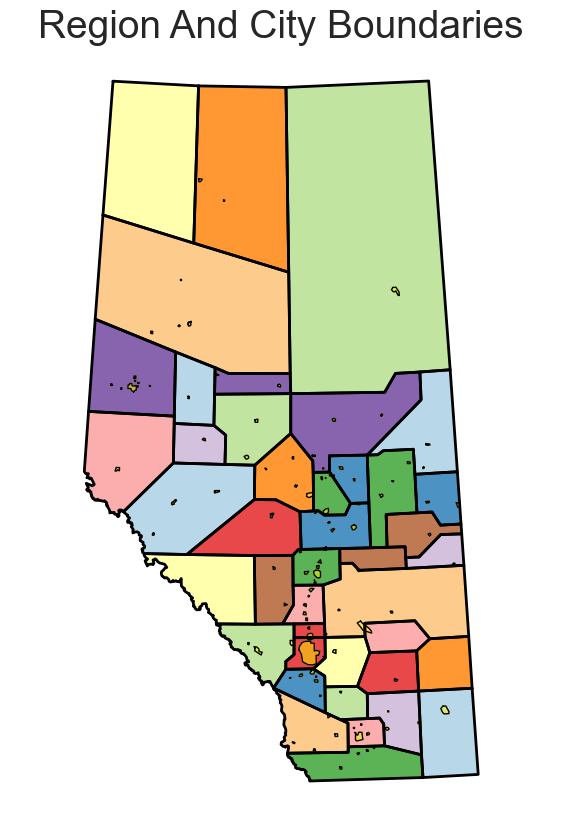

In [15]:
fig, ax = plt.subplots(figsize=(7, 10))

# Plot the first set of regions with distinct colors and labels
for idx, polygon in enumerate(planning_area_closed_regions):
    x, y = polygon.exterior.xy

    ax.fill(x, y, color=planning_area_colors[idx], alpha=0.8,
            label=f"Region {planning_area_gen_area_dict[idx + 1]}")
    ax.plot(x, y, 'k-', linewidth=2)

    if show_text_labels:
        text_location = polygon.representative_point()
        ax.text(text_location.x, text_location.y, f"{planning_area_gen_area_dict[idx + 1]}",
                fontsize=10, ha='center', color='black', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Plot the second set of regions WITHOUT adding them to the legend
for polygon in city_closed_regions:
    x, y = polygon.exterior.xy

    for i in range(5, 0, -1):
        ax.fill(x, y, color='yellow', alpha=0.03 * i, zorder=1)

    ax.fill(x, y, color="yellow", alpha=0.2, label="_nolegend_")  # "_nolegend_" prevents legend entry
    ax.plot(x, y, 'k-', linewidth=1, label="_nolegend_")  # No legend for city regions


# Formatting the plot
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Region And City Boundaries", fontsize=28)
# ax.legend()  # Only the first set of regions will appear in the legend
plt.grid(True)
plt.axis("equal")
plt.show()
